In [245]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [310]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [311]:
housing.shape

(545, 13)

In [312]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [313]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

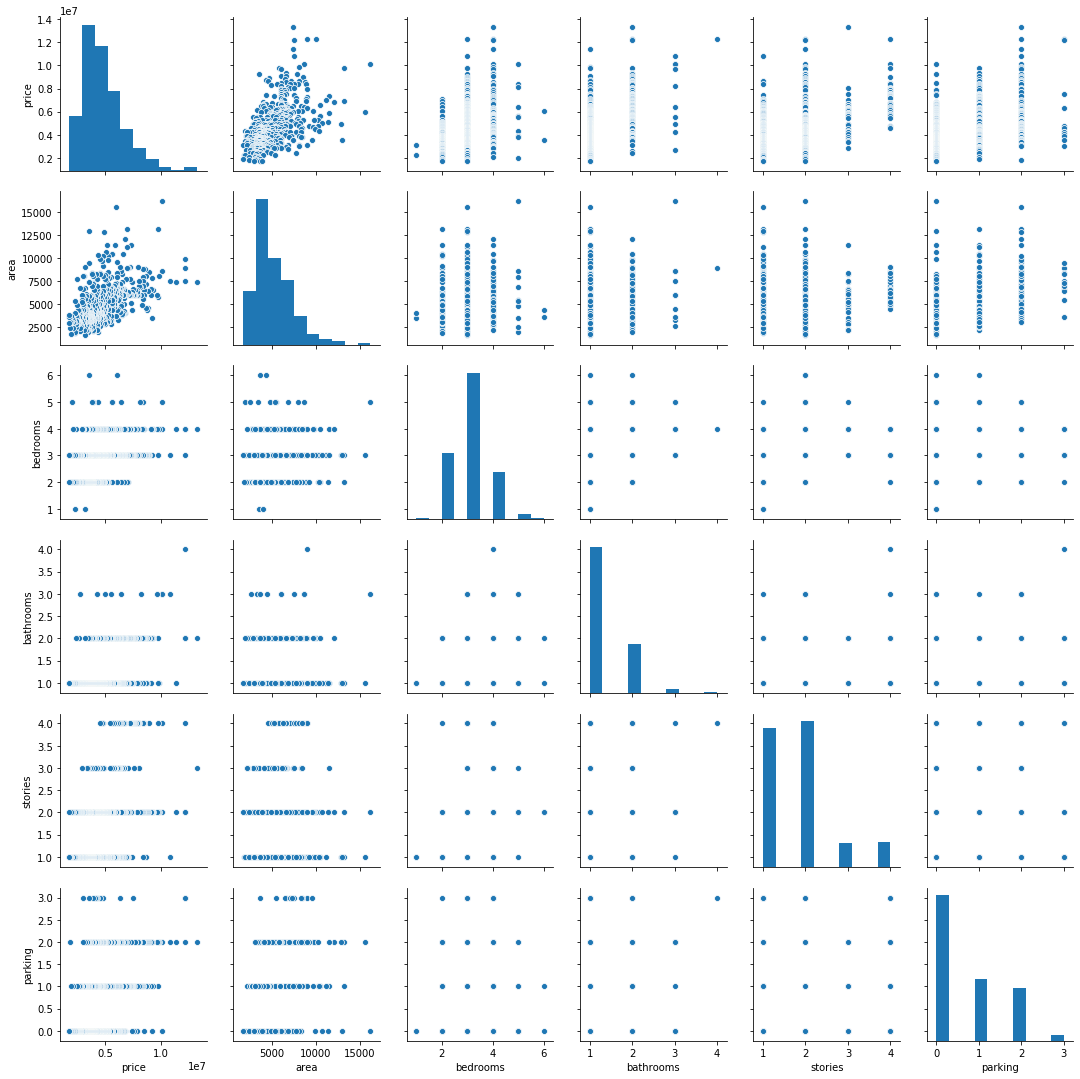

In [315]:
plt.figure(figsize=(15,15))
sns.pairplot(housing)
plt.show()

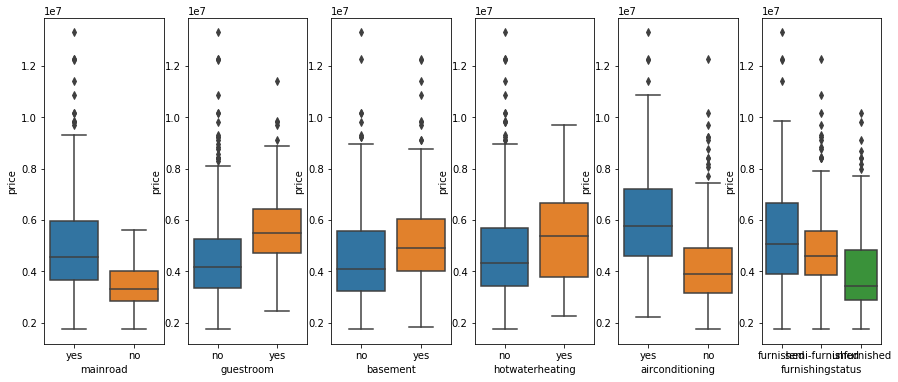

In [316]:
plt.figure(figsize=(15, 6))
plt.subplot(1,6,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(1,6,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(1,6,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(1,6,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(1,6,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(1,6,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
#plt.show()

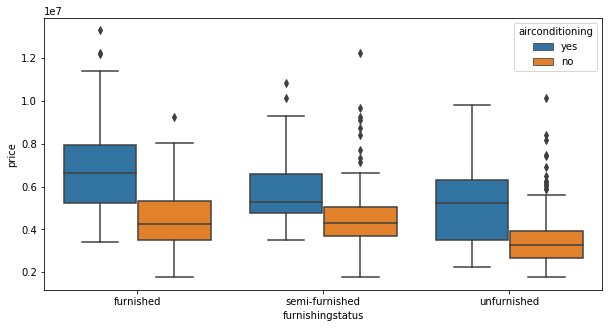

In [317]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [318]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[varlist] = housing[varlist].apply(binary_map)
housing[varlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [322]:
status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [323]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [324]:
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0,0,0


In [325]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,0,0


In [326]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [327]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [328]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


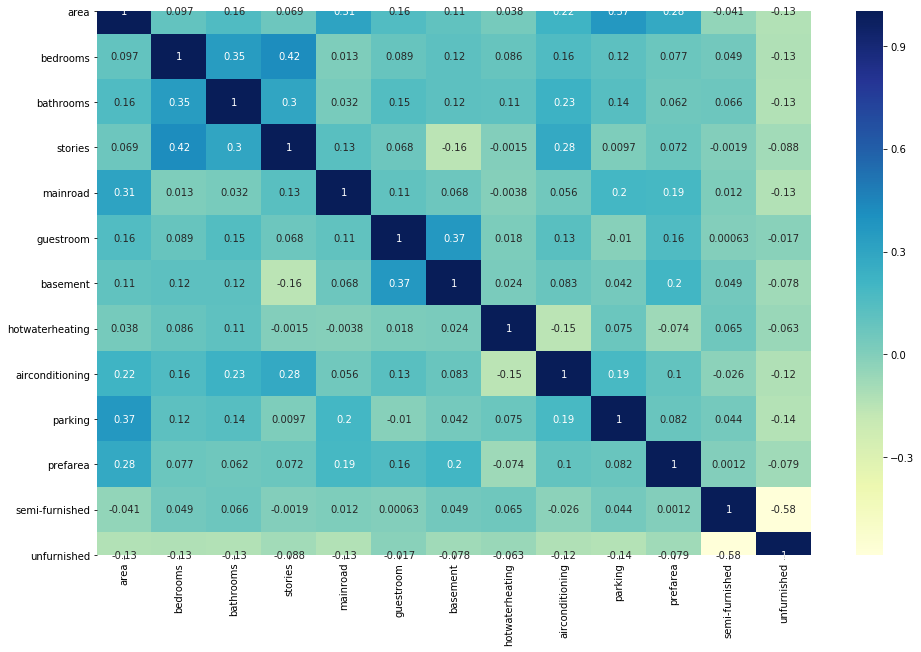

In [293]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

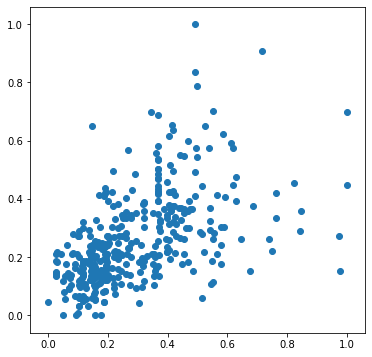

In [329]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

In [330]:
y_train = df_train.pop('price')
X_train = df_train
y_train
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0,0,0


In [331]:
#Fit a regression line through the training data using `statsmodels`. 
#Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because 
#if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train[['area']])
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.126894
area     0.462192
dtype: float64

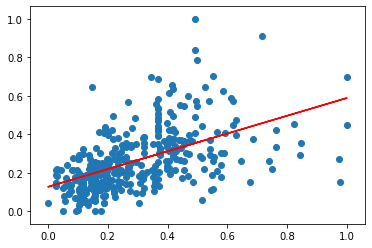

In [332]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [333]:
#Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           3.15e-29
Time:                        17:29:15   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [334]:
# Adding another variable. The R-squared value obtained is `0.283`.
#Since we have so many variables, we can clearly do better than this.
#So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`."
X_train_lm = X_train[['area', 'bathrooms']]

In [335]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [336]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           2.51e-54
Time:                        17:29:17   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [337]:
X_train_lm = X_train[['area', 'bathrooms','bedrooms']]
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
sm.OLS(y_train, X_train_lm).fit()
#lr.params

In [338]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           2.51e-54
Time:                        17:29:17   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [339]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [340]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000460
unfurnished       -0.015503
semi-furnished     0.000460
unfurnished       -0.015503
dtype: float64

In [341]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           8.83e-83
Time:                        17:29:19   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

Looking at the p-values,
it looks like some of the variables aren't really significant (in the presence of other variables).
Maybe we could drop some.We could simply drop the variable with the highest, non-significant p value. 
A better way would be to supplement this with the VIF information. 
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.
It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:


### $ VIF_i = frac{1}{1 - {R_i}^2} $

Check for the VIF values of the feature variables.

In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

In [343]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,semi-furnished,inf
12,unfurnished,inf
13,semi-furnished,inf
14,unfurnished,inf
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
9,parking,2.12
6,basement,2.02


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables.
Dropping highly correlated variables and insignificant variables

In [344]:
X = X_train.drop('semi-furnished', 1,)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,0,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [345]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
#Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           1.07e-83
Time:                        17:29:23   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [346]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,unfurnished,inf
12,unfurnished,inf
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67


### Dropping the Variable and Updating the Model
As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.
As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.
# Dropping highly correlated variables and insignificant variables

In [347]:
#X = X.drop('bedrooms', 1)
#Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           1.07e-83
Time:                        17:29:24   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

# Calculate the VIFs again for the new model

In [348]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,unfurnished,inf
12,unfurnished,inf
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67


### Dropping the variable and updating the model
As you might have noticed, dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. `basement` for instance, has a p-value of 0.03. We should drop this variable as well.

In [349]:
X = X.drop('basement', 1)
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     70.70
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           7.97e-84
Time:                        17:29:26   Log-Likelihood:                 379.84
No. Observations:                 381   AIC:                            -735.7
Df Residuals:                     369   BIC:                            -688.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0232      0.019     

# Calculate the VIFs again for the new model

In [350]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,unfurnished,inf
11,unfurnished,inf
1,bedrooms,6.13
4,mainroad,5.62
0,area,4.67
3,stories,2.45
8,parking,2.12
7,airconditioning,1.76
2,bathrooms,1.66
9,prefarea,1.47


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
## Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

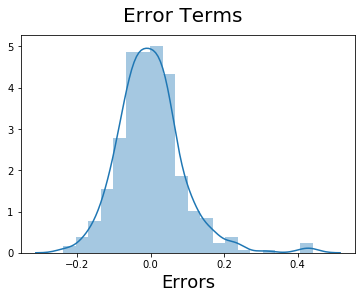

In [351]:
y_train_price = lr_4.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading \n",
plt.xlabel('Errors', fontsize = 18)                         # X-label"

## Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.
#### Applying the scaling on the test sets

In [352]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',"price"]
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [365]:
#y_test = df_test.pop('price')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)
X_test_m4

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0.000000,1,0,0
54,1.0,0.366420,0.5,0.333333,1,1,0,1,0.333333,0,0,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0.333333,1,0,0
244,1.0,0.306582,0.0,0.333333,1,1,0,0,0.000000,1,0,0
268,1.0,0.274023,0.0,0.333333,1,0,0,1,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.010032,0.5,0.333333,1,0,0,0,0.000000,1,1,1
191,1.0,0.780007,0.0,0.333333,1,1,0,0,0.000000,0,0,0
310,1.0,0.365100,0.0,0.000000,1,0,0,0,0.000000,0,0,0
46,1.0,0.366420,0.5,1.000000,1,0,0,1,0.333333,0,0,0


In [368]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
#X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)
lr_4 = sm.OLS(y_test, X_test_m4).fit()

# Making predictions using the fourth mode

In [369]:
y_pred_m4 = lr_4.predict(X_test_m4)
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     34.25
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           3.43e-34
Time:                        17:36:32   Log-Likelihood:                 152.77
No. Observations:                 164   AIC:                            -283.5
Df Residuals:                     153   BIC:                            -249.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0811      0.025     

# Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.
### plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'y_pred')

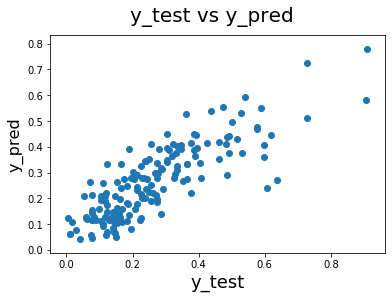

In [362]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

We can see that the equation of our best fitted line is:
$ price = 0.236 * area + 0.202 * bathrooms + 0.11 * stories + 0.05 * mainroad + 0.04 * times guestroom + 0.0876 * hotwaterheating + 0.0682 * airconditioning + 0.0629 * parking + 0.0637 * prefarea - 0.0337 * unfurnished  

Overall we have a decent model, but we also acknowledge that we could do better.
We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model